In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc("figure",dpi=150)
mpl.rc("figure",figsize=(3,2))

plt.rcParams["font.family"] = "Times New Roman"

/home/hapless/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Angular Velocity vs Frequency

In [2]:
csv_dir = './results_csv/'
csv_name = "frequency_vs_velocity.dat" #4 spikes
csv_name2 = "3_spikes.dat"#3 spikes

data = pd.read_csv(csv_dir + csv_name, sep = "\t", index_col = 0) #4 spikes
data2 = pd.read_csv(csv_dir + csv_name2, sep = "\t", index_col = 0) #3 spikes
data.head()

,v_up,v_up_error,v_dw,v_dw_error
frequencies,,,,
0.00,-0.000067,0.000022,0.000322,0.000060
1.00,-0.000428,0.000037,-0.000700,0.000216
2.00,-0.000328,0.000037,-0.000298,0.000121
3.00,0.000074,0.000047,-0.000499,0.000175
3.25,0.002841,0.000081,-0.001107,0.000317


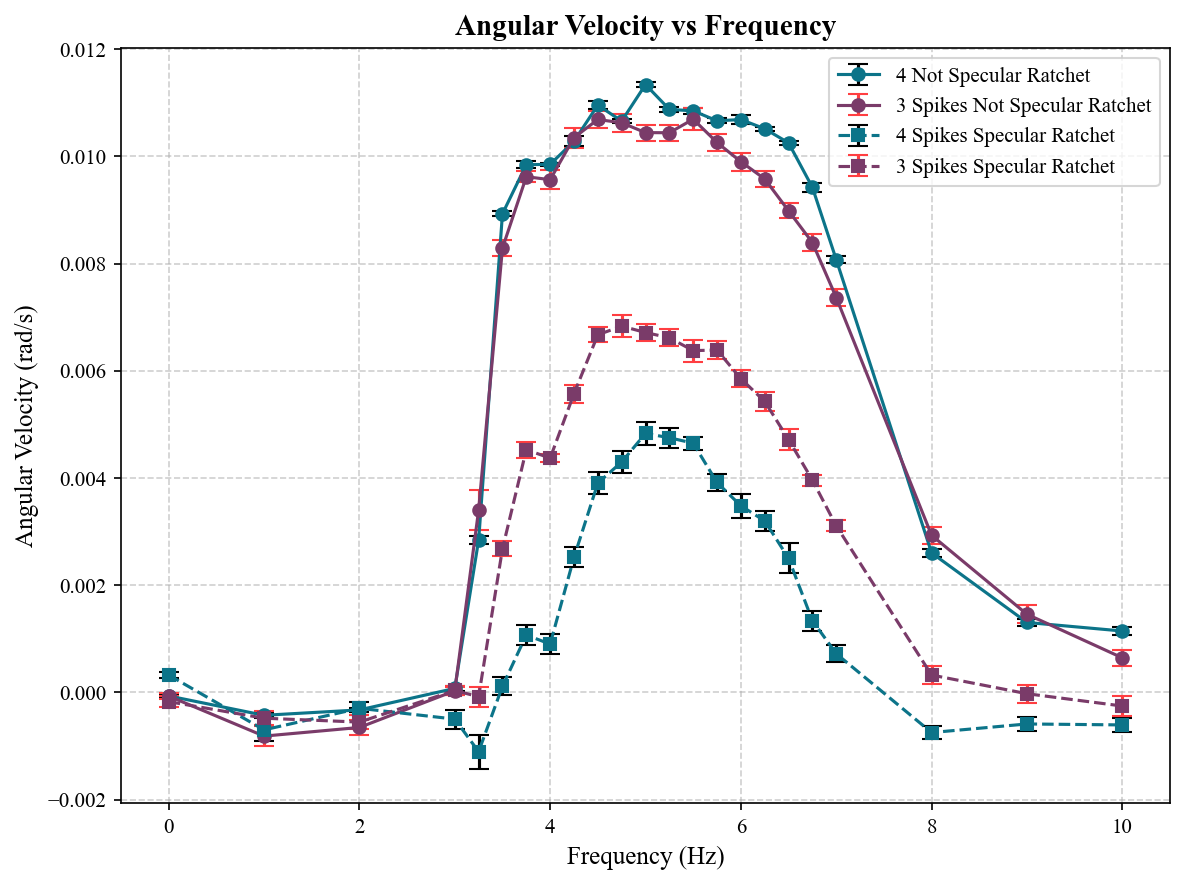

In [3]:
frequencies = data.index.values

##4 spikes
velocity_per_freq_normal = data.v_up
error_per_freq_normal =  data.v_up_error

velocity_per_freq_mirror =  data.v_dw
error_per_freq_mirror =  data.v_dw_error

#3 spikes
velocity_per_freq_normal2 = data2.v_up
error_per_freq_normal2 =  data2.v_up_error

velocity_per_freq_mirror2 =  data2.v_dw
error_per_freq_mirror2 =  data2.v_dw_error


# Crear una sola figura con un solo eje
plt.figure(figsize=(8, 6))

# Graficar ambos conjuntos de datos en el mismo eje
## 4 spikes
plt.errorbar(
    frequencies,
    velocity_per_freq_normal,
    yerr=error_per_freq_normal,
    fmt='o-',  # Marcadores circulares con línea continua
    color='#0C7489',#'blue',
    ecolor='#000000',  # Color de las barras de error
    capsize=5,     # Tamaño de las líneas horizontales en las barras de error
    label='4 Not Specular Ratchet'
)

# 3 spikes
plt.errorbar(
    frequencies,
    velocity_per_freq_normal2,
    yerr=error_per_freq_normal2,
    fmt='o-',  # Marcadores circulares con línea continua
    color='#7A3B69',
    ecolor='#FF3E41',  # Color de las barras de error
    capsize=5,     # Tamaño de las líneas horizontales en las barras de error
    label='3 Spikes Not Specular Ratchet'
)

#4 spiks
plt.errorbar(
    frequencies,
    velocity_per_freq_mirror,
    yerr=error_per_freq_mirror,
    fmt='s--',  # Marcadores cuadrados con línea discontinua
    color='#0C7489',
    ecolor='#000000',
    capsize=5,
    label='4 Spikes Specular Ratchet'
)

#3 spikes

plt.errorbar(
    frequencies,
    velocity_per_freq_mirror2,
    yerr=error_per_freq_mirror2,
    fmt='s--',  # Marcadores cuadrados con línea discontinua
    color='#7A3B69',
    ecolor='#FF3E41',
    capsize=5,
    label='3 Spikes Specular Ratchet'
)

# Configuración del gráfico
plt.title('Angular Velocity vs Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Angular Velocity (rad/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Ajustar diseño y mostrar figura
plt.tight_layout()
plt.savefig("./figures/AvsF.svg", format="svg")
plt.show()


# Trajectories